In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

df22 = pd.read_excel(r"C:/Users/arsinta/OneDrive/Documents/SAMCODIN 2022 (1).xlsx", header=1)
df23 = pd.read_excel(r"C:/Users/arsinta/OneDrive/Documents/SAMCODIN 2023 (1).xlsx", header=1)
df24 = pd.read_excel(r"C:/Users/arsinta/OneDrive/Documents/SAMCODIN 2024 new.xlsx", header=1)
df25 = pd.read_excel(r"C:/Users/arsinta/OneDrive/Documents/SAMCODIN JAN-NOV 2025.xlsx", header=1)

df22["tahun"] = 2022
df23["tahun"] = 2023
df24["tahun"] = 2024
df25["tahun"] = 2025

df = pd.concat([df22, df23, df24, df25], ignore_index=True)
df

,Jenis Transaksi,Tujuan Penyaluran,Alamat Tujuan,Nama Kota/Kab Tujuan,Nama Provinsi TUjuan,Nama Zat Aktif,Nama Obat Jadi,Produsen Obat Jadi,Nama PBF,Provinsi,Kabupaten/Kota,No. Faktur,Tanggal Penyaluran,Batch,Jumlah,Satuan,Tanggal Kedaluwarsa,Keterangan,tahun
0,Dalam Negeri,@ RIS FARMA APT TULUNGAGUNG,TULUNGAGUNG,tulungagung,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,HAPEEL PHARMINDO,Jawa Timur,Kab. Malang,FJ/HPL/22/11/1398,2022-11-22,10404BC,3.0,"DUS, 10 STRIP @ 10 TABLET",2025-03-01 00:00:00,NaN,2022
1,Dalam Negeri,`18` APOTEK,NGAWI,ngawi,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,CAHAYA MUTIARA FARMA,Jawa Timur,Kab. Sidoarjo,72199/CMF/10/22,2022-10-22,10413BK,2.0,"DUS, 10 STRIP @ 10 TABLET",2025-09-01 00:00:00,NaN,2022
2,Dalam Negeri,0ADITAMA MAKMUR SENTOSA,LAMPUNG,lampung,LAMPUNG,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,CAHAYA MUTIARA FARMA,Jawa Timur,Kab. Sidoarjo,39985/CMF/06/22,2022-06-23,10413BEMERAH1,400.0,"DUS, 10 STRIP @ 10 TABLET",2025-05-01 00:00:00,NaN,2022
3,Dalam Negeri,0ASITA SUKSES ABADI PHARMINDO,SURABAYA TIMUR,surabaya,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,CAHAYA MUTIARA FARMA,Jawa Timur,Kab. Sidoarjo,37119/CMF/06/22,2022-06-10,10431BDPINKTUA,200.0,"DUS, 10 STRIP @ 10 TABLET",2025-04-01 00:00:00,NaN,2022
4,Dalam Negeri,0ASITA SUKSES ABADI PHARMINDO,SURABAYA TIMUR,surabaya,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,CAHAYA MUTIARA FARMA,Jawa Timur,Kab. Sidoarjo,37119/CMF/06/22,2022-06-10,10430BDUNGU,200.0,"DUS, 10 STRIP @ 10 TABLET",2025-04-01 00:00:00,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46664,Dalam Negeri,"ZIA 2, APOTEK",JL. GANDUSARI - TRENGGALEK RT 39 RW 06 SUMBERI...,trenggalek,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,NAURA MEDIKA SEJAHTERA,Jawa Timur,Kota Surabaya,SI.2025.01.03913,2025-01-16,10423DE,1.0,"DUS, 10 STRIP @ 10 TABLET",0000-00-00,NaN,2025
46665,Dalam Negeri,"ZIADA, APOTEK",JL RAYA MALANGSUKO RT 05 RW 02 TUMPANGMALANG,kab. malang,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,NAURA MEDIKA SEJAHTERA,Jawa Timur,Kota Surabaya,SI.2025.05.06209,2025-05-27,10406DL,1.0,"DUS, 10 STRIP @ 10 TABLET",0000-00-00,NaN,2025
46666,Dalam Negeri,"ZIADA, APOTEK",JL RAYA MALANGSUKO RT 05 RW 02 TUMPANGMALANG,kab. malang,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,NAURA MEDIKA SEJAHTERA,Jawa Timur,Kota Surabaya,SI.2025.01.00465,2025-01-03,10423DE,2.0,"DUS, 10 STRIP @ 10 TABLET",0000-00-00,NaN,2025
46667,Dalam Negeri,"ZORA FARMA, APOTEK","JL.MASTRIP NO.69 B,SUMBERSARI,JEMBER JEMBER",jember,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,SURYA EKA PUTRA,Jawa Timur,Kota Surabaya,PRA-2508-000028,2025-08-02,10408EE,1.0,"DUS, 10 STRIP @ 10 TABLET",2028-05-01 00:00:00,NaN,2025


In [15]:
df.columns = (
    df.columns.astype(str)
    .str.strip().str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

if ("kabupaten_kota" not in df.columns) and ("nama_kota_kab_tujuan" in df.columns):
    df = df.rename(columns={"nama_kota_kab_tujuan": "kabupaten_kota"})

print("PREVIEW DATA (SEBELUM CLEANING)")
print(df.head(5))

PREVIEW DATA (SEBELUM CLEANING)
  jenis_transaksi              tujuan_penyaluran   alamat_tujuan  \
0    Dalam Negeri    @ RIS FARMA APT TULUNGAGUNG     TULUNGAGUNG   
1    Dalam Negeri                    `18` APOTEK           NGAWI   
2    Dalam Negeri        0ADITAMA MAKMUR SENTOSA         LAMPUNG   
3    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   
4    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   

  nama_kota_kab_tujuan nama_provinsi_tujuan  \
0          tulungagung           JAWA TIMUR   
1                ngawi           JAWA TIMUR   
2              lampung              LAMPUNG   
3             surabaya           JAWA TIMUR   
4             surabaya           JAWA TIMUR   

                                      nama_zat_aktif nama_obat_jadi  \
0  CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...       SAMCODIN   
1  CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...       SAMCODIN   
2  CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...       SAMC

In [16]:
df["tanggal_penyaluran"] = pd.to_datetime(df["tanggal_penyaluran"], errors="coerce")
df["jumlah"] = pd.to_numeric(df["jumlah"], errors="coerce")

df = df.dropna(subset=["tanggal_penyaluran", "jumlah", "kabupaten_kota"])
df = df[df["jumlah"] > 0]

df["kabupaten_kota"] = (
    df["kabupaten_kota"].astype(str)
    .str.lower().str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

df["bulan_tahun"] = df["tanggal_penyaluran"].dt.to_period("M").astype(str)

print("\nPREVIEW DATA SETELAH CLEANING")
print(df.head(10))

print("\nRINGKASAN DATA (DESKRIPTIF JUMLAH)")
print(df["jumlah"].describe())



PREVIEW DATA SETELAH CLEANING
  jenis_transaksi              tujuan_penyaluran   alamat_tujuan  \
0    Dalam Negeri    @ RIS FARMA APT TULUNGAGUNG     TULUNGAGUNG   
1    Dalam Negeri                    `18` APOTEK           NGAWI   
2    Dalam Negeri        0ADITAMA MAKMUR SENTOSA         LAMPUNG   
3    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   
4    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   
5    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   
6    Dalam Negeri  0ASITA SUKSES ABADI PHARMINDO  SURABAYA TIMUR   
7    Dalam Negeri       0BANYUWANGI PHARMA UTAMA      BANYUWANGI   
8    Dalam Negeri           0BERKAT KURNIA FARMA       BONDOWOSO   
9    Dalam Negeri       0BINA MITRA JAYA BERSAMA       SIDOARJO4   

  nama_kota_kab_tujuan nama_provinsi_tujuan  \
0          tulungagung           JAWA TIMUR   
1                ngawi           JAWA TIMUR   
2              lampung              LAMPUNG   
3             surabaya          

In [17]:
intervention_month = "2023-10"

df["periode"] = np.where(
    df["bulan_tahun"] < intervention_month,
    "Sebelum Kebijakan",
    "Sesudah Kebijakan"
)

print("\nJUMLAH OBSERVASI PER PERIODE")
print(df["periode"].value_counts())



JUMLAH OBSERVASI PER PERIODE
periode
Sesudah Kebijakan    30388
Sebelum Kebijakan    16266
Name: count, dtype: int64



DATA AGREGASI BULANAN (preview)
  bulan_tahun     jumlah
0     2022-01  68377.400
1     2022-02  60451.400
2     2022-03  61576.000
3     2022-04  52577.400
4     2022-05  57890.125
5     2022-06  54332.600
6     2022-07  38933.000
7     2022-08  45853.500
8     2022-09  96272.900
9     2022-10  66606.000


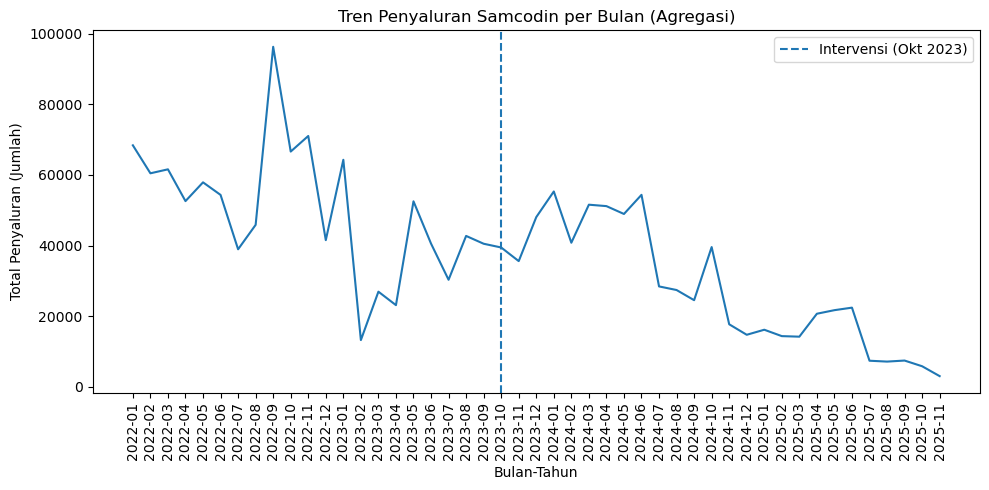

In [18]:
its_ts = (
    df.groupby("bulan_tahun")["jumlah"]
      .sum()
      .reset_index()
)

print("\nDATA AGREGASI BULANAN (preview)")
print(its_ts.head(10))

plt.figure(figsize=(10,5))
plt.plot(its_ts["bulan_tahun"], its_ts["jumlah"])
plt.axvline(intervention_month, linestyle="--", label="Intervensi (Okt 2023)")
plt.xticks(rotation=90)
plt.title("Tren Penyaluran Samcodin per Bulan (Agregasi)")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Penyaluran (Jumlah)")
plt.legend()
plt.tight_layout()
plt.show()



RINGKASAN MODEL ITS (SEGMENTED REGRESSION)
                            OLS Regression Results                            
Dep. Variable:                 jumlah   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     47.99
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           8.88e-14
Time:                        08:38:21   Log-Likelihood:                -509.24
No. Observations:                  47   AIC:                             1026.
Df Residuals:                      43   BIC:                             1034.
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const   

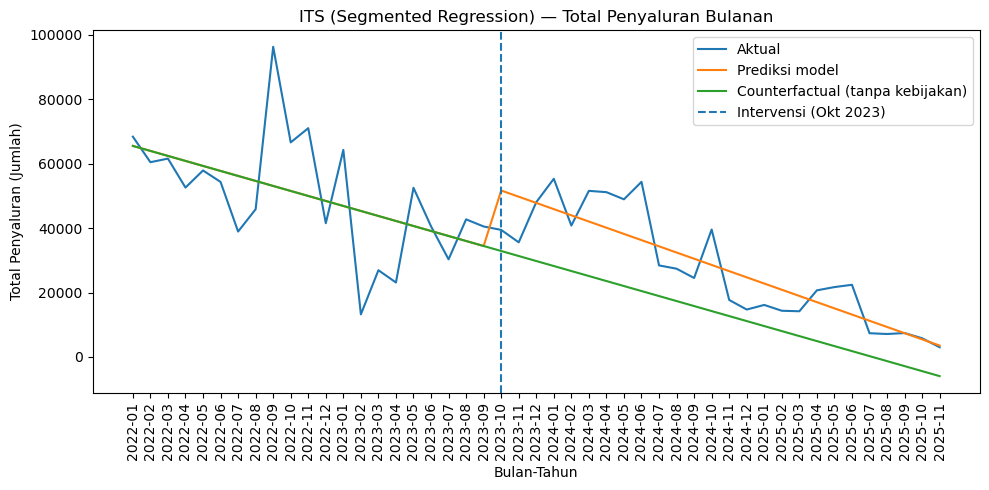

In [19]:
its_ts["month_ts"] = pd.to_datetime(its_ts["bulan_tahun"] + "-01")
its_ts = its_ts.sort_values("month_ts").reset_index(drop=True)

its_ts["time"] = np.arange(1, len(its_ts) + 1)
its_ts["post"] = (its_ts["bulan_tahun"] >= intervention_month).astype(int)

first_post_time = its_ts.loc[its_ts["post"] == 1, "time"].min()
its_ts["time_after"] = np.where(its_ts["post"] == 1, its_ts["time"] - first_post_time + 1, 0)

y = its_ts["jumlah"]
X = sm.add_constant(its_ts[["time", "post", "time_after"]])

model = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 2})

print("\nRINGKASAN MODEL ITS (SEGMENTED REGRESSION)")
print(model.summary())

its_ts["yhat"] = model.predict(X)

X_cf = X.copy()
X_cf["post"] = 0
X_cf["time_after"] = 0
its_ts["yhat_counterfactual"] = model.predict(X_cf)

plt.figure(figsize=(10,5))
plt.plot(its_ts["bulan_tahun"], its_ts["jumlah"], label="Aktual")
plt.plot(its_ts["bulan_tahun"], its_ts["yhat"], label="Prediksi model")
plt.plot(its_ts["bulan_tahun"], its_ts["yhat_counterfactual"], label="Counterfactual (tanpa kebijakan)")
plt.axvline(intervention_month, linestyle="--", label="Intervensi (Okt 2023)")
plt.xticks(rotation=90)
plt.title("ITS (Segmented Regression) — Total Penyaluran Bulanan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Penyaluran (Jumlah)")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
sebelum = df[df["periode"] == "Sebelum Kebijakan"]["jumlah"]
sesudah = df[df["periode"] == "Sesudah Kebijakan"]["jumlah"]

print("\nDESKRIPTIF SEBELUM KEBIJAKAN")
print(sebelum.describe())

print("\nDESKRIPTIF SESUDAH KEBIJAKAN")
print(sesudah.describe())

stat, p_value = mannwhitneyu(sebelum, sesudah, alternative="two-sided")

print("\nHASIL UJI MANN–WHITNEY")
print(f"Statistik U : {stat}")
print(f"P-value     : {p_value}")



DESKRIPTIF SEBELUM KEBIJAKAN
count    16266.000000
mean        64.522951
std        102.568945
min          1.000000
25%          2.000000
50%          5.000000
75%        190.000000
max        800.000000
Name: jumlah, dtype: float64

DESKRIPTIF SESUDAH KEBIJAKAN
count    30388.000000
mean        23.618870
std         67.106344
min          1.000000
25%          2.000000
50%          3.000000
75%         10.000000
max        970.000000
Name: jumlah, dtype: float64

HASIL UJI MANN–WHITNEY
Statistik U : 303082668.0
P-value     : 0.0


In [21]:
city_period = (
    df.groupby(["kabupaten_kota", "periode"])
      .agg(
          total_jumlah=("jumlah", "sum"),
          n_transaksi=("jumlah", "count")
      )
      .reset_index()
)

total_per_period = city_period.groupby("periode")["total_jumlah"].sum().to_dict()
city_period["share"] = city_period.apply(lambda r: r["total_jumlah"] / total_per_period[r["periode"]], axis=1)

city_period["log_total"] = np.log1p(city_period["total_jumlah"])
city_period["log_tx"] = np.log1p(city_period["n_transaksi"])

print("\nPREVIEW FITUR KAB/KOTA PER PERIODE (untuk PCA)")
print(city_period.head(10))



PREVIEW FITUR KAB/KOTA PER PERIODE (untuk PCA)
    kabupaten_kota            periode  total_jumlah  n_transaksi     share  \
0  kab. banyuwangi  Sebelum Kebijakan        2001.0          302  0.001907   
1  kab. banyuwangi  Sesudah Kebijakan        1401.0          275  0.001952   
2      kab. blitar  Sebelum Kebijakan        1448.0           39  0.001380   
3      kab. blitar  Sesudah Kebijakan        4641.0          176  0.006466   
4   kab. bondowoso  Sebelum Kebijakan         232.0           25  0.000221   
5   kab. bondowoso  Sesudah Kebijakan         247.0           37  0.000344   
6      kab. jember  Sesudah Kebijakan         400.0            4  0.000557   
7      kab. kediri  Sebelum Kebijakan        2404.0          485  0.002291   
8      kab. kediri  Sesudah Kebijakan        6809.0         1956  0.009487   
9    kab. lamongan  Sesudah Kebijakan        1999.0           67  0.002785   

   log_total    log_tx  
0   7.601902  5.713733  
1   7.245655  5.620401  
2   7.278629  3.68


EXPLAINED VARIANCE PCA (PC1, PC2)
[0.8241177  0.14549851]


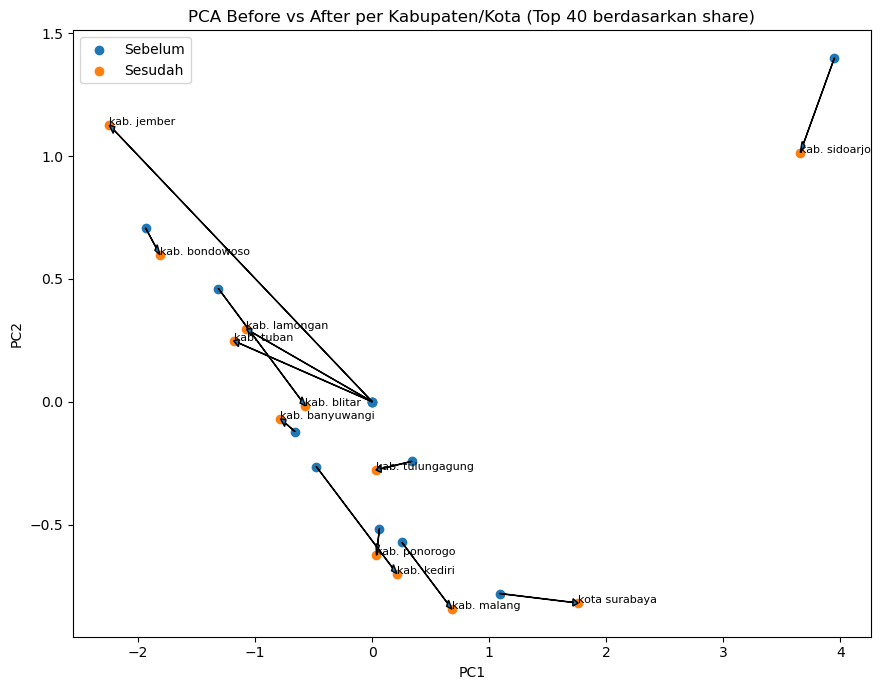

In [22]:
X_pca = city_period[["log_total", "share", "log_tx"]].values
X_scaled = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components=2, random_state=42)
PC = pca.fit_transform(X_scaled)

city_period["PC1"] = PC[:, 0]
city_period["PC2"] = PC[:, 1]

print("\nEXPLAINED VARIANCE PCA (PC1, PC2)")
print(pca.explained_variance_ratio_)

before = city_period[city_period["periode"] == "Sebelum Kebijakan"][["kabupaten_kota", "PC1", "PC2", "total_jumlah", "share"]].copy()
after  = city_period[city_period["periode"] == "Sesudah Kebijakan"][["kabupaten_kota", "PC1", "PC2", "total_jumlah", "share"]].copy()

before = before.rename(columns={"PC1": "PC1_before", "PC2": "PC2_before", "total_jumlah": "total_before", "share": "share_before"})
after  = after.rename(columns={"PC1": "PC1_after",  "PC2": "PC2_after",  "total_jumlah": "total_after",  "share": "share_after"})

pair = before.merge(after, on="kabupaten_kota", how="outer").fillna(0)
pair["importance"] = pair["share_before"] + pair["share_after"]

topN = 40
plot_df = pair.sort_values("importance", ascending=False).head(topN)

plt.figure(figsize=(9,7))
plt.scatter(plot_df["PC1_before"], plot_df["PC2_before"], label="Sebelum")
plt.scatter(plot_df["PC1_after"],  plot_df["PC2_after"],  label="Sesudah")

for _, r in plot_df.iterrows():
    plt.arrow(
        r["PC1_before"], r["PC2_before"],
        r["PC1_after"] - r["PC1_before"],
        r["PC2_after"] - r["PC2_before"],
        length_includes_head=True,
        head_width=0.03
    )
    plt.text(r["PC1_after"], r["PC2_after"], r["kabupaten_kota"], fontsize=8)

plt.title(f"PCA Before vs After per Kabupaten/Kota (Top {topN} berdasarkan share)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
agg = (
    df.groupby(["nama_kota_kab_tujuan", "periode"])
      .agg(
          total_jumlah=("jumlah", "sum"),
          n_transaksi=("jumlah", "count")
      )
      .reset_index()
)

# hitung total penyaluran nasional per periode
total_periode = agg.groupby("periode")["total_jumlah"].sum().to_dict()

# hitung share per kab/kota
agg["share"] = agg.apply(
    lambda r: r["total_jumlah"] / total_periode[r["periode"]],
    axis=1
)

print("PREVIEW AGREGASI KAB/KOTA")
display(agg.head())


PREVIEW AGREGASI KAB/KOTA


,nama_kota_kab_tujuan,periode,total_jumlah,n_transaksi,share
0,KOTA PROBOLINGGO,Sesudah Kebijakan,14.0,4,0.000020
1,bangkalan,Sesudah Kebijakan,1.0,1,0.000001
2,Amuntai,Sebelum Kebijakan,300.0,1,0.000286
3,BANGKALAN,Sebelum Kebijakan,77144.0,431,0.073509
4,BANGKALAN,Sesudah Kebijakan,145.0,12,0.000202



RATA-RATA VARIABEL PER CLUSTER (BUKTI RENDAH-SEDANG-TINGGI):


C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,cluster_raw,total_jumlah,n_transaksi,share,cluster_012
0,1,9806.363636,178.181818,0.009344,0
1,0,33262.885714,416.500000,0.031695,1
2,2,72116.656250,791.750000,0.068718,2


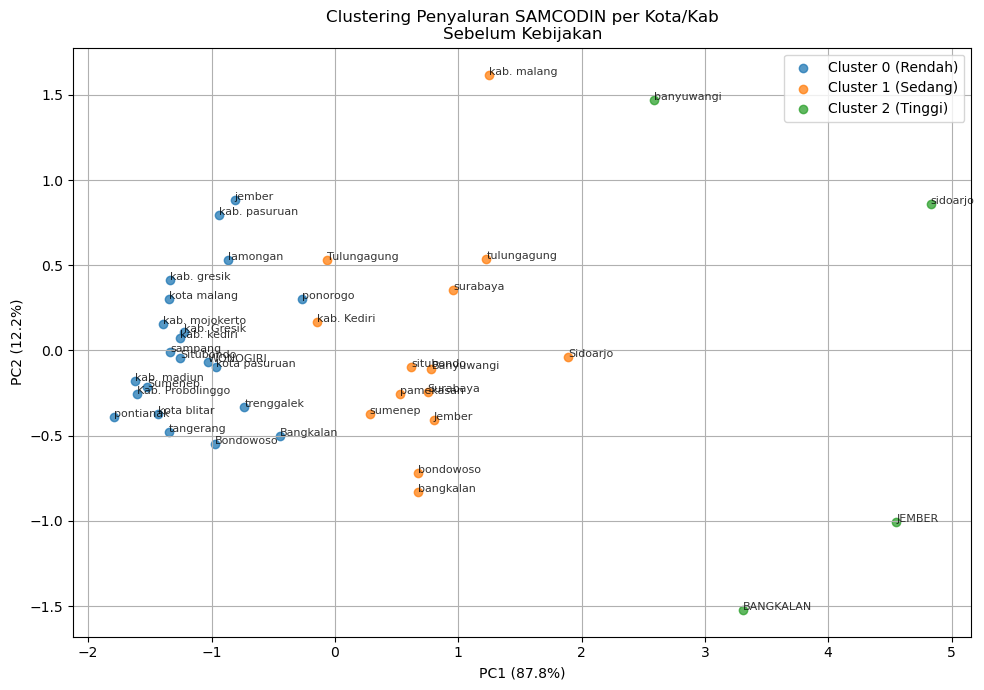


RATA-RATA VARIABEL PER CLUSTER (BUKTI RENDAH-SEDANG-TINGGI):


C:\Users\arsinta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,cluster_raw,total_jumlah,n_transaksi,share,cluster_012
0,0,9260.289844,308.687500,0.012902,0
1,1,32889.859000,1142.666667,0.045825,1
2,2,61067.015000,1974.000000,0.085084,2


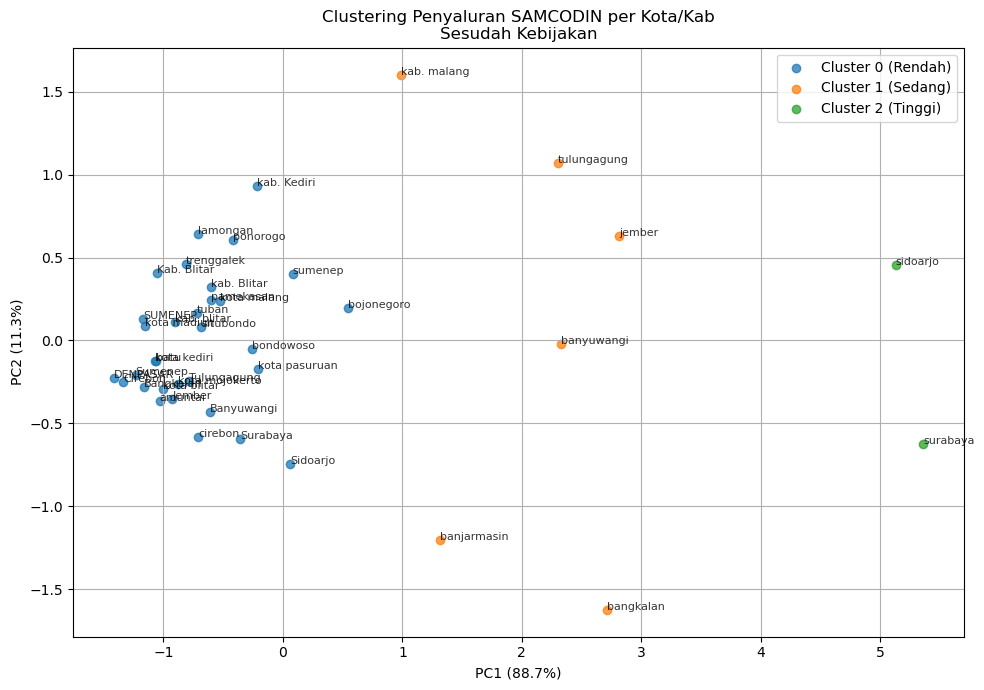

In [28]:
cluster_sebelum = cluster_pca_plot(
    agg[agg["periode"] == "Sebelum Kebijakan"],
    "Clustering Penyaluran SAMCODIN per Kota/Kab\nSebelum Kebijakan",
    n_clusters=3,
    top_n=40,
    city_col="nama_kota_kab_tujuan"
)

cluster_sesudah = cluster_pca_plot(
    agg[agg["periode"] == "Sesudah Kebijakan"],
    "Clustering Penyaluran SAMCODIN per Kota/Kab\nSesudah Kebijakan",
    n_clusters=3,
    top_n=40,
    city_col="nama_kota_kab_tujuan"
)
